<a href="https://colab.research.google.com/github/pafernannapi18/GithubIntro/blob/main/20_Assignmentpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 【problem1】Hypothetical function

In [16]:
def _linear_hypothesis(self, X):
    """
    Compute a linear hypothetical function
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data
    Returns
    -------
      The following form of ndarray, shape (n_samples, 1)
      Estimated result by linear hypothetical function
    """
    return np.dot(X, self.coef_.T)

## 【problem2】Steepest descent

In [17]:
def _gradient_descent(self, X, error):
    """
    Write a description
    """
    pass
    error = self._linear_hypothesis(X) - y
    self.coef_ -= (self.lr/len(X)) * np.matmul(error, X)

    return self.coef_

## 【problem 3】Estimated

In [18]:
def predict(self, X):
  """
  Estimate using linear regression
  Parameters

  X : ndarray of the following form, shape (n_samples, n_features)
  Returns
       ndarray of the following form, shape (n_samples,1)
       Estimate result from linear regression
  """
  prediction = self._linear_hypothesis(X)
  return prediction

## 【problem 4】Mean squared error

In [19]:
def MSE(y_pred, y):
  """
  Calculation of mean square error
    Parameters
    ----------
    y_pred : ndarray of the following form, shape (n_samples,)
      Estimated value
    y : ndarray of the following form, shape (n_samples,)
      Correct answer value
    Returns
    ----------
    mse : numpy.float
      Mean squared error
    """
  mse = np.square(y_pred - y).mean()
  return mse

## 【problem 5】Objective function

In [20]:
def _objective_function(y_pred, y):

  """
  Calculation of loss
    Parameters
    ----------
    y_pred : ndarray of the following form, shape (n_samples,)
      Estimated value
    y : ndarray of the following form, shape (n_samples,)
      Correct answer value
    Returns
    ----------
    mse : numpy.float
      Mean squared error
    """
  loss = np.sum((y_pred - y)**2)/(2* len(y))
  return loss

## 【Problem 6】Learning and estimation

Learn and estimate scratch implementations from the House Prices competition data provided in Sprint 02, an introduction to machine learning scratch.

Compare this with the scikit-learn implementattion and see if it works correctly.

In [21]:
import pandas as pd

trains = pd.read_csv("/content/drive/MyDrive/Train dataset/train.csv")
X1 = trains.loc[:,['GrLivArea', 'YearBuilt']]
y1 = trains.loc[:, 'SalePrice'] 

X = X1.to_numpy()
y = y1.to_numpy()

In [22]:
import numpy as np
np.random.seed(42)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
X_train.shape, X_val.shape

((1168, 2), (292, 2))

## ScratchLinearRegression class

In [24]:
import numpy as np

In [25]:
np.random.rand(len(X[0]))

array([0.37454012, 0.95071431])

In [26]:
bias = np.ones(len(X)).reshape(-1, 1)
bias.shape

(1460, 1)

In [27]:
class ScratchLinearRegression():
    """
    Scratch implementation of linear regression
    
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    
    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.coef_ = None

        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):

      """
        Learn linear regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        # Set the presence or absence of the bias term. When False(with bias), 
        # X_0=1 is concat to X.
      if self.no_bias:
        self.coef_ = np.random.rand(len(X[0]))
          # Since there are two types of features (two columns: 'GrlivArea', 
          #'YearBuilt'), prepare two random coefficient as init
      else:
          bias = np.ones(len(X)).reshape(-1, 1)
          X = np.concatenate((bias, X), axis=1)
          self.coef_ = np.random.rand(len(X[0]))

          if self.verbose:
            print(f'bias.shape: {bias.shape}') 
            print(f'X.shape:{X.shape}')
            print(f'X_val.shape:{X_val.shape}') 
      for i in range(self.iter):
          y_pred = self._linear_hypothesis(X) #Predict y_pred from the i-th training data X_train using the coefficient self....
          y_pred_val = self.predict(X_val) # Predict y_pred_vol using the coefficient self.coef_ from the i-th data for X_vol

          self.coef_ = self._gradient_descent(X, y) #Calculate the new coefficient by gradient descent

          self.loss[i] = self._objective_function(y_pred, y) #Calculate the loss function using y_pred calulated from the new...
          self.val_loss[i] = self._objective_function(y_pred_val, y_val)
    
    def _gradient_descent(self, X, y):
      """
      Train a linear regression model using steepest descent when called by the fit method.

      Parameters

      X : ndarray of the following form, shape (n_samples, n_features)
      """
      error = self._linear_hypothesis(X) - y
      self.coef_ -=(self.lr/len(X)) * np.matmul(error, X)

      return self.coef_       
          
    def _linear_hypothesis(self, X):

      """
      Compute a linear hypothetical function
      Parameters
      ----------
      X : The following forms of ndarray, shape (n_samples, n_features)
      Training data
      Returns
      -------
      The following form of ndarray, shape (n_samples, 1)
      Estimated result by linear hypothetical function
      """
      return np.dot(X, self.coef_.T)

    def _objective_function(self, y_pred, y):
      """
      Calculation of loss
      Parameters
      ----------
      y_pred : ndarray of the following form, shape (n_samples,)
      Estimated value
      y : ndarray of the following form, shape (n_samples,)
      Correct answer value
      Returns
      ----------
      mse : numpy.float
      Mean squared error
      """
      loss = np.sum((y_pred - y)**2)/(2* len(y))
      return loss

    def predict(self, X):
        """
        Estimate using linear regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by linear regression
        """
        if self.no_bias:
          pass
        else:
          bias = np.ones(len(X)).reshape(-1, 1)
          X = np.concatenate((bias, X), axis=1)
        prediction = np.dot(X, self.coef_.T)
        return prediction

In [28]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [29]:
model = ScratchLinearRegression(num_iter= 5000, lr = 0.001, no_bias = False, verbose=True)
model.fit(X_train, y_train, X_val, y_val)
y_pred = model.predict(X_val)

bias.shape: (1168, 1)
X.shape:(1168, 3)
X_val.shape:(292, 2)


In [30]:
print('MSE Scratch Linear Regression: {:.3g}'.format(MSE(y_val, y_pred)))

MSE Scratch Linear Regression: 2.5e+09


Checking the result of a linear regression model from sklearn

In [31]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_val)

## 【Problem 7】Learning curve plot
Create and execuute a function that displays the learning curve. Look at the graph to see if the loss is down properly.

In the template of the linear regression class, the lloss is recorded in self.loss and self.val_loss, so please use this for input.

<function matplotlib.pyplot.show>

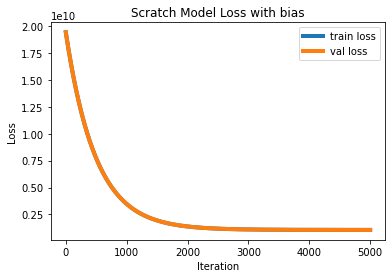

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure

plt.plot(np.arange(len(model.loss)), model.loss, lw=4, label='train loss')
plt.plot(np.arange(len(model.val_loss)), model.loss, lw=4, label='val loss')

plt.title("Scratch Model Loss with bias")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.show

【problem 8】(Advance task) Removal of bias term

Examine how learning changes when the bias term ᶿ0 is removed. Also, discuss and investigate the role off the bias term in linear regression models.

In [33]:
model_wb = ScratchLinearRegression(num_iter= 5000, lr = 0.001, no_bias = True, verbose=False)
model_wb.fit(X_train, y_train, X_val, y_val)
y_pred = model_wb.predict(X_val)

In [34]:
print('MSE Scratch Linear Regression without bias: {:.3g}'.format(MSE(y_val, y_pred)))

MSE Scratch Linear Regression without bias: 3.59e+10


<function matplotlib.pyplot.show>

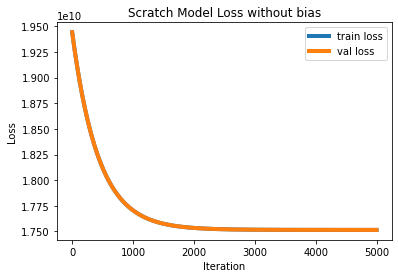

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure

plt.plot(np.arange(len(model_wb.loss)), model_wb.loss, lw=4, label='train loss')
plt.plot(np.arange(len(model_wb.val_loss)), model_wb.loss, lw=4, label='val loss')

plt.title("Scratch Model Loss without bias")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.show

The presence of the bias term significantly reduced the mean squared error compared to the case with the bis term.

The bias decreases discepancy between the mean of the target balue and target value and that of the hypothetical function.

【problem 9】(Advance task) Multidimensional feature quantity

Please verify how the learning result changes when the square or cube of the featuree is used for input.


In [36]:
np.random.seed(0)
X_2 = X**2
X_3 = X**3
X_2_train, X_2_val, y_train, y_val = train_test_split(X_2, y, test_size=0.2)
X_3_train, X_3_val, y_train, y_val = train_test_split(X_3, y, test_size=0.2)

scaler.fit(X_2_train)
scaler.fit(X_3_train)

X_2_train = scaler.transform(X_2_train)
X_2_val = scaler.transform(X_2_val)

X_3_train = scaler.transform(X_3_train)
X_3_val = scaler.transform(X_3_val)

In [37]:
model_2 = ScratchLinearRegression(num_iter= 5000, lr = 0.001, no_bias = False, verbose=False)
model_2.fit(X_2_train, y_train, X_2_val, y_val)
y_pred_2 = model_2.predict(X_2_val)

In [38]:
print('MSE Scratch Linear Regression with the square of X: {:.3g}'.format(MSE(y_val, y_pred_2)))

MSE Scratch Linear Regression with the square of X: 6.85e+09


In [39]:
model_3 = ScratchLinearRegression(num_iter= 5000, lr = 0.001, no_bias = False, verbose=False)
model_3.fit(X_3_train, y_train, X_3_val, y_val)
y_pred_3 = model_3.predict(X_3_val)

In [40]:
print('MSE Scratch Linear Regression with the cube of X: {:.3g}'.format(MSE(y_val, y_pred_3)))

MSE Scratch Linear Regression with the cube of X: 3.09e+09


<function matplotlib.pyplot.show>

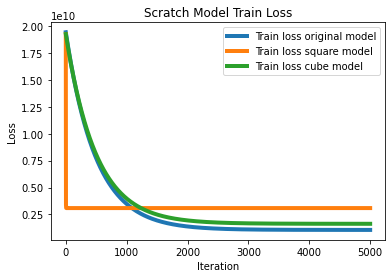

In [41]:
plt.plot(np.arange(len(model.loss)), model.loss, lw=4, label='Train loss original model')
plt.plot(np.arange(len(model_2.val_loss)), model_2.loss, lw=4, label='Train loss square model')
plt.plot(np.arange(len(model_3.val_loss)), model_3.loss, lw=4, label='Train loss cube model')


plt.title("Scratch Model Train Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.show

<function matplotlib.pyplot.show>

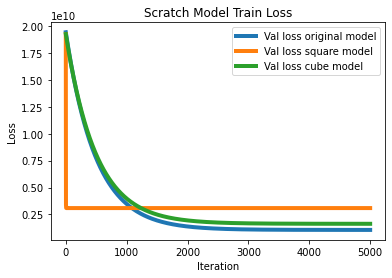

In [42]:
plt.plot(np.arange(len(model.val_loss)), model.loss, lw=4, label='Val loss original model')
plt.plot(np.arange(len(model_2.val_loss)), model_2.loss, lw=4, label='Val loss square model')
plt.plot(np.arange(len(model_3.val_loss)), model_3.loss, lw=4, label='Val loss cube model')


plt.title("Scratch Model Train Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.show

## 【problem 10】(Advance task) Derivation of update formula